In [1]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [5]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

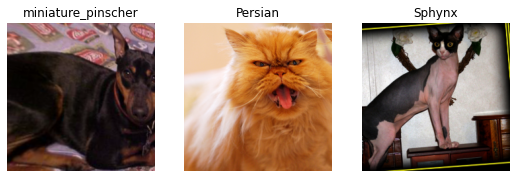

In [6]:
dls.show_batch(nrows=1, ncols=3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


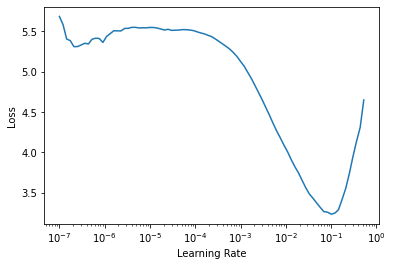

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.296991,0.373562,0.106901,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.459977,0.308077,0.093369,01:10
1,0.451693,0.374692,0.121110,01:11
2,0.321682,0.284107,0.073748,01:10
3,0.177024,0.238185,0.069012,01:08
4,0.108262,0.209230,0.063599,01:08


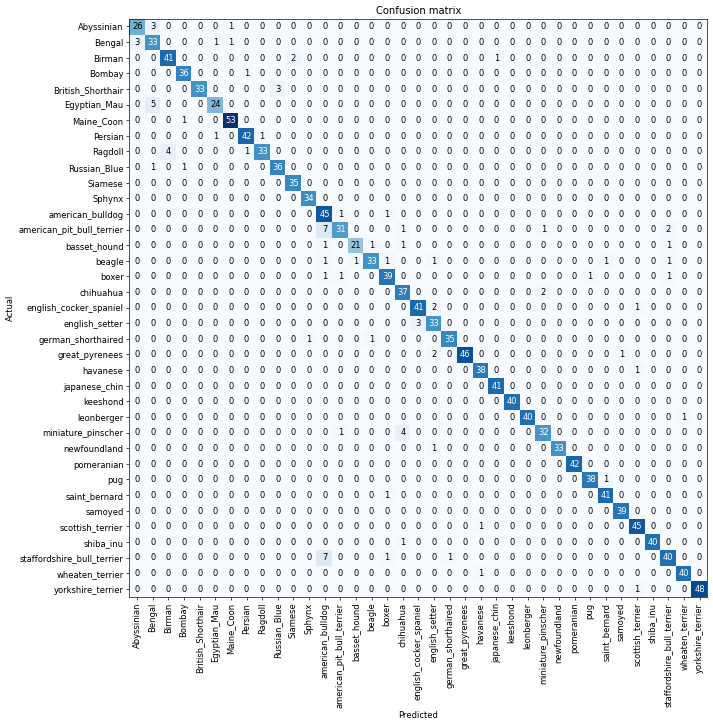

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [10]:
learn.export('pet_classifier_resnet34.pkl')

In [11]:
!pwd

/content


In [12]:
!ls /content

models	pet_classifier_resnet34.pkl  sample_data


In [13]:
learn.export('drive/MyDrive/colab/pet_classifier_resnet34.pkl')